In [2]:
# clr/clr and cld/cld omf analysis timeseries
# initial built: 2024/10/17
# to demonstrate the 'counter-intuitive varbc effect' 
# need to first run compile_radstat and then read the csv output
# modified based on "obs_space_clr_clr_cld_cld_omf_and_omfbc", which calculates the time mean
# this script plots the time evolution

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [9]:
instrument = 'atms'
channel    = 'ch1'
'''
exps = ['ctrl','ctrl_noinf', \
        'only_clr_clr', 'clr_and_cld_0.05', \
        'clr_and_cld_0.05_sym', \
        'clr_and_cld_0.05_obs', \
        'clr_and_cld_0.05_model']
'''
exps = ['ctrl']


norm_by = 'sym_error' # final error or sym_error

init_time  = datetime(2022, 6, 10,  0,  0, 0)  # Year, month, day, hour, minute, second
final_time = datetime(2022, 7, 20,  0,  0, 0)  # Year, month, day, hour, minute, second
dt         = 6 # in hours

In [10]:
df={};
mean_clr_nobc={}; mean_clr_bc={}; mean_cld_nobc={}; mean_cld_bc={};
datetimes=[];

for exp in exps:
    print(f'processing {exp}')
    current_time = init_time
    
    mean_clr_nobc[exp] = []
    mean_clr_bc  [exp] = []
    mean_cld_nobc[exp] = []
    mean_cld_bc  [exp] = []
    
    while current_time <= final_time:
        format_time  = current_time.strftime("%Y%m%d%H")
        datetimes.append(format_time)
        
        if (current_time.hour == 0) & (np.mod(current_time.day,5)== 0):
            print(f'time = {format_time}')
        
        fn = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/compile_radstats/csv_files/{exp}/each_cycle/{format_time}/omf_stats_{instrument}_{channel}_{format_time}.csv'
        tmpdf=pd.read_csv(fn)
        
        # dfs = data frame screend
        screen = (tmpdf['fwater'] > 0.99) & (tmpdf['fland'] < 0.01) & ( tmpdf['errinv_ges'] >0 )
        dfs = tmpdf.loc[screen]

        # clr/clr and cld/cld definition
        cld_cri = 0.03
        clr_def = (dfs['clw_obs'] <= cld_cri) & (dfs['clw_bg_ges'] <= cld_cri)
        cld_def = (dfs['clw_obs']  > cld_cri) & (dfs['clw_bg_ges']  > cld_cri)

        df_clr = dfs.loc[clr_def]
        df_cld = dfs.loc[cld_def]
        
        if norm_by == 'final_error':
            # normalized by the final obs error:
            omf_clr_nobc = df_clr['omfnbc_ges'].values * df_clr['errinv_ges'].values
            omf_clr_bc   = df_clr['omf_ges'].values    * df_clr['errinv_ges'].values
            omf_cld_nobc = df_cld['omfnbc_ges'].values * df_cld['errinv_ges'].values
            omf_cld_bc   = df_cld['omf_ges'].values    * df_cld['errinv_ges'].values
        
        elif norm_by == 'sym_error':
            ## normalized by the symmetric cloud
            omf_clr_nobc = df_clr['omfnbc_ges'].values / df_clr['symerr_ges'].values
            omf_clr_bc   = df_clr['omf_ges'].values    / df_clr['symerr_ges'].values
            omf_cld_nobc = df_cld['omfnbc_ges'].values / df_cld['symerr_ges'].values
            omf_cld_bc   = df_cld['omf_ges'].values    / df_cld['symerr_ges'].values
        
        
        # calculate the mean      
        mean_clr_nobc[exp].append( np.mean(omf_clr_nobc) )
        mean_clr_bc[exp].append  ( np.mean(omf_clr_bc) )
        mean_cld_nobc[exp].append( np.mean(omf_cld_nobc) )
        mean_cld_bc[exp].append  ( np.mean(omf_cld_bc) )
        
        
        # progress to the next time step
        current_time = current_time + timedelta(hours=dt)

processing ctrl
time = 2022061000


/home/Chih-Chi.Hu/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/Chih-Chi.Hu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


time = 2022061500
time = 2022062000
time = 2022062500
time = 2022063000
time = 2022070500
time = 2022071000
time = 2022071500
time = 2022072000


NameError: name 'sensor' is not defined

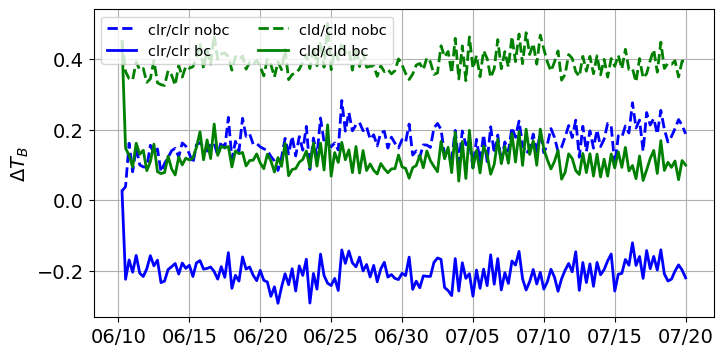

In [11]:
fig, ax = plt.subplots(figsize=(8,4))

exp_list = exps
nt = len(datetimes)

for e, exp in enumerate(exp_list):
    
    ax.plot(datetimes[:nt], mean_clr_nobc[exp][:nt],  linestyle='--', label=f'clr/clr nobc', color='blue', linewidth=2)
    ax.plot(datetimes[:nt], mean_clr_bc[exp][:nt],  linestyle='-', label=f'clr/clr bc', color='blue', linewidth=2)
    ax.plot(datetimes[:nt], mean_cld_nobc[exp][:nt],  linestyle='--', label=f'cld/cld nobc', color='green', linewidth=2)
    ax.plot(datetimes[:nt], mean_cld_bc[exp][:nt],  linestyle='-', label=f'cld/cld bc', color='green', linewidth=2)
    

    interval = 20
    ticks_to_show = datetimes[::interval]

    #ax.legend(loc='best', fontsize=10.5, ncol=1, bbox_to_anchor=(1, 0.4))
    ax.legend(loc='best', fontsize=10.5, ncol=2)

    ax.set_xticks(ticks_to_show)
    ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
    ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)


    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel(r'$\Delta T_B$',fontsize=14)

    ax.grid(True)
    ax.set_title(f'{sensor} [{chanl}] varBC increment',fontsize=14)

    plt.tight_layout()

In [17]:
datetime

['2022061012',
 '2022061018',
 '2022061100',
 '2022061106',
 '2022061112',
 '2022061118',
 '2022061200',
 '2022061206',
 '2022061212',
 '2022061218',
 '2022061300',
 '2022061306',
 '2022061312',
 '2022061318',
 '2022061400',
 '2022061406',
 '2022061412',
 '2022061418',
 '2022061500',
 '2022061506',
 '2022061512',
 '2022061518',
 '2022061600',
 '2022061606',
 '2022061612',
 '2022061618',
 '2022061700',
 '2022061706',
 '2022061712',
 '2022061718',
 '2022061800',
 '2022061806',
 '2022061812',
 '2022061818',
 '2022061900',
 '2022061906',
 '2022061912',
 '2022061918',
 '2022062000',
 '2022062006',
 '2022062012',
 '2022062018',
 '2022062100',
 '2022062106',
 '2022062112',
 '2022062118',
 '2022062200',
 '2022062206',
 '2022062212',
 '2022062218',
 '2022062300',
 '2022062306',
 '2022062312',
 '2022062318',
 '2022062400',
 '2022062406',
 '2022062412',
 '2022062418',
 '2022062500',
 '2022062506',
 '2022062512',
 '2022062518',
 '2022062600',
 '2022062606',
 '2022062612',
 '2022062618',
 '20220627